In [1]:
import pandas as pd
import numpy as np

In [2]:
# CRASH

In [3]:
df2020c = pd.read_csv('CISS_2020_CSV_FILES/CRASH.CSV',encoding='cp1252')
df2021c = pd.read_csv('CISS_2021_CSV_FILES/CRASH.CSV',encoding='cp1252')
df2022c = pd.read_csv('CISS_2022_CSV_FILES/CRASH.CSV',encoding='cp1252')

In [4]:
len(df2020c), len(df2021c), len(df2022c)

(3700, 3331, 2929)

In [5]:
dfcrash=pd.concat([df2020c,df2021c,df2022c])

In [6]:
dfcrash.shape

(9960, 24)

In [7]:
dfcrash.head()

,CASEID,CRASHYEAR,PSU,CASENO,CASENUMBER,CATEGORY,CRASHMONTH,DAYOFWEEK,CRASHTIME,EVENTS,...,CINJSEV,CTREAT,ALCINV,DRGINV,MANCOLL,SUMMARY,PANDEMIC,CASEWGT,PSUSTRAT,VERSION
0,18342,2020,76,50,1-76-2020-050-07,7,7,2,06:50,1,...,0,0,9,9,0,"V1 was traveling northwest on a two way, two l...",0.0,156.802185,3,5
1,18343,2020,76,51,1-76-2020-051-08,8,7,5,13:52,1,...,0,4,9,9,0,"V1 was traveling north on a two way, two lane,...",0.0,23.532876,3,5
2,18346,2020,26,105,1-26-2020-105-02,2,7,7,17:51,2,...,0,3,2,2,4,V1 was in the number 1 lane of a 2-lane roadwa...,0.0,24.541683,10,5
3,18348,2020,18,48,1-18-2020-048-03,3,7,3,14:38,1,...,0,9,2,2,1,Vehicle #2 was stopped facing east in lane 1 o...,0.0,124.452828,6,5
4,18357,2020,26,107,1-26-2020-107-09,9,7,1,00:19,2,...,0,4,2,2,0,V1 was traveling west exiting a freeway in a s...,0.0,1651.087300,10,5


In [8]:
# ADAS

In [9]:
full_adas = pd.read_csv('DataNew/full_adas.csv',encoding='cp1252')

In [10]:
full_adas.shape

(17182, 4)

In [11]:
full_adas.head()

,CASEID,VEHNO,VehicleType,ADAS
0,16035,1,MULTIPURPOSE PASSENGER VEHICLE (MPV),0
1,16035,2,TRUCK,0
2,16037,1,TRUCK,0
3,16038,1,PASSENGER CAR,0
4,16038,2,PASSENGER CAR,0


In [12]:
# GV

In [13]:
df2020gv = pd.read_csv('CISS_2020_CSV_FILES/GV.CSV',encoding='cp1252')
df2021gv = pd.read_csv('CISS_2021_CSV_FILES/GV.CSV',encoding='cp1252')
df2022gv = pd.read_csv('CISS_2022_CSV_FILES/GV.CSV',encoding='cp1252')

In [14]:
len(df2020gv), len(df2021gv), len(df2022gv)

(6405, 5935, 5166)

In [15]:
dfgv=pd.concat([df2020gv,df2021gv,df2022gv])

In [16]:
dfgv.shape

(17506, 109)

In [17]:
dfgv.head()

,CASEID,PSU,CASENO,CASENUMBER,CATEGORY,VEHNO,VIN,VINLENGTH,MAKE,MODEL,...,EDGEDISTX,EDGEDISTY,EDGEDISTZ,CASEWGT,PSUSTRAT,VERSION,VPICMAKE,VPICMODEL,VPICBODYCLASS,ICFINALBODY
0,15939,14,1,1-14-2020-001-04,4,1,5N1DR2MNXHC6,17,35,401,...,99.8,99.8,99.8,207.684599,8,5,NaN,NaN,NaN,NaN
1,15939,14,1,1-14-2020-001-04,4,2,1GTEK19T12E1,17,23,481,...,99.8,99.8,99.8,207.684599,8,5,NaN,NaN,NaN,NaN
2,15939,14,1,1-14-2020-001-04,4,3,1YVHZ8DH3C5M,17,41,50,...,99.8,99.8,99.8,207.684599,8,5,NaN,NaN,NaN,NaN
3,15942,77,1,1-77-2020-001-04,4,1,5J6YH28593L0,17,37,403,...,3.2,1.7,3.5,316.720072,9,5,NaN,NaN,NaN,NaN
4,15942,77,1,1-77-2020-001-04,4,2,4T1B11HK9KU6,17,49,40,...,99.8,99.8,99.8,316.720072,9,5,NaN,NaN,NaN,NaN


In [18]:
#dfc1 = dfgv[dfgv['CASEID', 'VEHNO', 'CAIS', 'DAYOFWEEK', 'MANCOLL']]

In [19]:
#dfgv1 = dfgv[dfgv['CASEID', 'VEHNO', 'CRASHCONF', 'RELTOJUNC', 'WEATHER', 'SURFCOND', 'SURFTYPE']]

In [20]:
dfgv1 = dfgv[['CASEID', 'VEHNO', 'VAIS']]

In [21]:
dfc1 = dfcrash[['CASEID', 'CAIS', 'MANCOLL']]

In [22]:
# Perform an inner merge on 'CASEID' and 'VEHNO'
df = pd.merge(full_adas, dfgv1, how="inner", on=['CASEID', 'VEHNO'])

df.head()

,CASEID,VEHNO,VehicleType,ADAS,VAIS
0,16035,1,MULTIPURPOSE PASSENGER VEHICLE (MPV),0,0
1,16035,2,TRUCK,0,0
2,16037,1,TRUCK,0,0
3,16038,1,PASSENGER CAR,0,95
4,16038,2,PASSENGER CAR,0,99


In [23]:
# Filter rows where ADAS is 1
vais_adas_1 = df[df['ADAS'] == 1]['VAIS']

# Filter rows where ADAS is 0
vais_adas_0 = df[df['ADAS'] == 0]['VAIS']

# Count frequency of each VAIS category for ADAS = 1
vais_adas_1_counts = vais_adas_1.value_counts()

# Count frequency of each VAIS category for ADAS = 0
vais_adas_0_counts = vais_adas_0.value_counts()

# Display frequency counts for VAIS when ADAS is 1
print("Frequency of VAIS categories when ADAS is 1:")
print(vais_adas_1_counts)

# Display frequency counts for VAIS when ADAS is 0
print("\nFrequency of VAIS categories when ADAS is 0:")
print(vais_adas_0_counts)


Frequency of VAIS categories when ADAS is 1:
VAIS
0     1455
1     1032
95     625
9      382
99     375
2      329
3      191
4       42
5       26
6       15
Name: count, dtype: int64

Frequency of VAIS categories when ADAS is 0:
VAIS
0     3925
95    2806
1     2118
99    1181
9     1106
2      703
3      548
4      151
5      100
6       72
Name: count, dtype: int64


In [24]:
# Remove rows where VAIS > 95
df = df[df['VAIS'] <= 10]

# Display the first few rows of the updated DataFrame
df.head()

,CASEID,VEHNO,VehicleType,ADAS,VAIS
0,16035,1,MULTIPURPOSE PASSENGER VEHICLE (MPV),0,0
1,16035,2,TRUCK,0,0
2,16037,1,TRUCK,0,0
5,16048,1,PASSENGER CAR,0,2
6,16052,1,PASSENGER CAR,0,1


In [25]:
df.shape

(12195, 5)

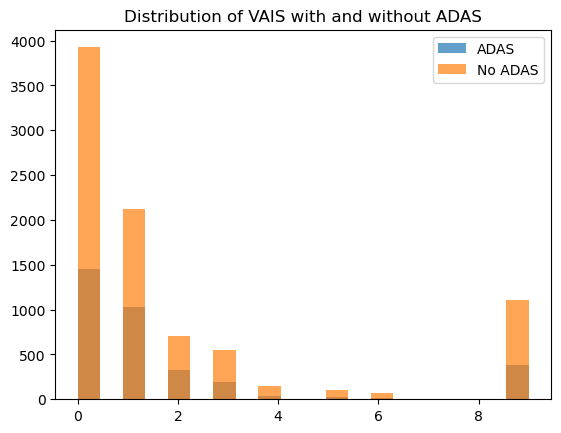

ADAS group normality test: ShapiroResult(statistic=0.6273257732391357, pvalue=0.0)
No ADAS group normality test: ShapiroResult(statistic=0.6496928930282593, pvalue=0.0)


C:\Users\inusa\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [26]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Filter VAIS values into two groups: with ADAS and without ADAS
vais_adas = df[df['ADAS'] == 1]['VAIS']
vais_no_adas = df[df['ADAS'] == 0]['VAIS']

# Plot histograms for both groups
plt.hist(vais_adas, bins=20, alpha=0.7, label='ADAS')
plt.hist(vais_no_adas, bins=20, alpha=0.7, label='No ADAS')
plt.legend()
plt.title("Distribution of VAIS with and without ADAS")
plt.show()

# Perform Shapiro-Wilk test for normality
print("ADAS group normality test:", stats.shapiro(vais_adas))
print("No ADAS group normality test:", stats.shapiro(vais_no_adas))


In [27]:
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(vais_adas, vais_no_adas)

print("Mann-Whitney U Test Results:")
print(f"U-statistic = {u_stat}, P-value = {p_value}")

# Interpretation
if p_value < 0.05:
    print("The presence of ADAS has a statistically significant effect on VAIS.")
else:
    print("The presence of ADAS does not have a statistically significant effect on VAIS.")


Mann-Whitney U Test Results:
U-statistic = 15182580.0, P-value = 0.812044495130726
The presence of ADAS does not have a statistically significant effect on VAIS.


In [28]:
# Perform an inner merge on 'CASEID'
df = pd.merge(full_adas, dfc1, how="inner", on=['CASEID'])

df.head()

,CASEID,VEHNO,VehicleType,ADAS,CAIS,MANCOLL
0,16035,1,MULTIPURPOSE PASSENGER VEHICLE (MPV),0,0,4
1,16035,2,TRUCK,0,0,4
2,16037,1,TRUCK,0,0,0
3,16038,1,PASSENGER CAR,0,99,1
4,16038,2,PASSENGER CAR,0,99,1


In [29]:
df.shape

(17182, 6)

In [30]:
# Perform an inner merge on 'CASEID'
df = pd.merge(full_adas, dfc1, how="inner", on=['CASEID'])

# Select only the first instance of each CASEID
df = df.drop_duplicates(subset=['CASEID'])

# Display the result
df.head()

,CASEID,VEHNO,VehicleType,ADAS,CAIS,MANCOLL
0,16035,1,MULTIPURPOSE PASSENGER VEHICLE (MPV),0,0,4
2,16037,1,TRUCK,0,0,0
3,16038,1,PASSENGER CAR,0,99,1
5,16048,1,PASSENGER CAR,0,2,0
6,16052,1,PASSENGER CAR,0,1,0


In [31]:
df.shape

(9939, 6)

In [32]:
# Filter rows where ADAS is 1
mancoll_adas_1 = df[df['ADAS'] == 1]['MANCOLL']

# Filter rows where ADAS is 0
mancoll_adas_0 = df[df['ADAS'] == 0]['MANCOLL']

# Count frequency of each MANCOLLcategory for ADAS = 1
mancoll_adas_1_counts = mancoll_adas_1.value_counts()

# Count frequency of each MANCOLLcategory for ADAS = 0
mancoll_adas_0_counts = mancoll_adas_0.value_counts()

# Display frequency counts for VAIS when ADAS is 1
print("Frequency of MANCOLL categories when ADAS is 1:")
print(mancoll_adas_1_counts)

# Display frequency counts for VAIS when ADAS is 0
print("\nFrequency of MANCOLL categories when ADAS is 0:")
print(mancoll_adas_0_counts)


Frequency of MANCOLL categories when ADAS is 1:
MANCOLL
0    1110
4     837
1     440
5     102
2      69
9      41
6      34
Name: count, dtype: int64

Frequency of MANCOLL categories when ADAS is 0:
MANCOLL
0    2923
4    2335
1    1224
2     298
5     272
6     131
9     123
Name: count, dtype: int64
